In [17]:
from scipy.io import loadmat

data = loadmat('datasets/distancematrices102.mat')
print(data.keys())  # Покажет, какие переменные есть в файле
print(data)  # Покажет, что хранится в переменной D1


dict_keys(['__header__', '__version__', '__globals__', 'Dsiftint', 'Dhsv', 'Dsiftbdy', 'Dhog'])
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 23:34:52 2009', '__version__': '1.0', '__globals__': [], 'Dsiftint': array([[0.        , 1.64716094, 1.85601516, ..., 1.75544945, 1.84912726,
        1.80309493],
       [1.64716094, 0.        , 1.88162833, ..., 1.73675125, 1.76682957,
        1.72410005],
       [1.85601516, 1.88162833, 0.        , ..., 1.85741757, 1.87918369,
        1.88531453],
       ...,
       [1.75544945, 1.73675125, 1.85741757, ..., 0.        , 1.52346245,
        1.54352209],
       [1.84912726, 1.76682957, 1.87918369, ..., 1.52346245, 0.        ,
        1.59574376],
       [1.80309493, 1.72410005, 1.88531453, ..., 1.54352209, 1.59574376,
        0.        ]]), 'Dhsv': array([[0.        , 1.84613582, 1.21886359, ..., 1.60388786, 1.70990589,
        1.48176529],
       [1.84613582, 0.        , 1.96676115, ..., 1.97515981, 1.99763434,
   

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import pickle
import os
import random
import time
import csv
import scipy
import scipy.io
import sys
import tarfile

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import tensorflow.keras.callbacks as C
import tensorflow.keras.optimizers as O
import tensorflow.keras.utils as U
import tensorflow.keras.losses as LS
import tensorflow.keras.metrics as M
import tensorflow.keras.initializers as I
import tensorflow.keras.regularizers as R
import tensorflow.keras.constraints as C
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, LearningRateScheduler, ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import optimizers



In [39]:
EPOCHS = 50
BATCH_SIZE = 128
LR = 1e-3
VAL_SPLIT = 0.2

CLASS_NUM = 102
IMG_SIZE = 128
IMG_CHANNELS = 3
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)

DATA_PATH = 'datasets/'
PATH = 'datasets/'

In [40]:
os.makedirs(PATH, exist_ok=True)

Random_Seed = 42

np.random.seed(Random_Seed)
PYTHONHASHSEED = 0

In [66]:
import os
import pandas as pd

# Папка с изображениями
DATA_PATH = "datasets/jpg/"
LABELS_PATH = "datasets/segmim/"

# Список файлов изображений в папке с метками
image_files = [f for f in os.listdir(LABELS_PATH) if os.path.isfile(os.path.join(LABELS_PATH, f))]

# Извлекаем метки из имени файлов
# Допустим, метка указана в имени файла, например, image1_0.jpg для категории 0
labels = [f.split('_')[1].split('.')[0] for f in image_files]  # Здесь предполагается, что метка находится в названии

# Создаем DataFrame
df = pd.DataFrame({
    'Id': sorted(image_files),  # Имена файлов
    'Category': labels  # Метки, извлеченные из имен файлов
})

print(df.head())  # Вывод первых строк DataFrame


                 Id Category
0  segmim_00001.jpg    06915
1  segmim_00002.jpg    04864
2  segmim_00003.jpg    08086
3  segmim_00004.jpg    01908
4  segmim_00005.jpg    08092


In [67]:
df.head(5)



,Id,Category
0,segmim_00001.jpg,06915
1,segmim_00002.jpg,04864
2,segmim_00003.jpg,08086
3,segmim_00004.jpg,01908
4,segmim_00005.jpg,08092


In [69]:
df['Category'].value_counts()

Category
06915    1
02883    1
07737    1
07051    1
01420    1
        ..
07706    1
06418    1
01377    1
05111    1
03874    1
Name: count, Length: 8189, dtype: int64

<Axes: ylabel='Category'>

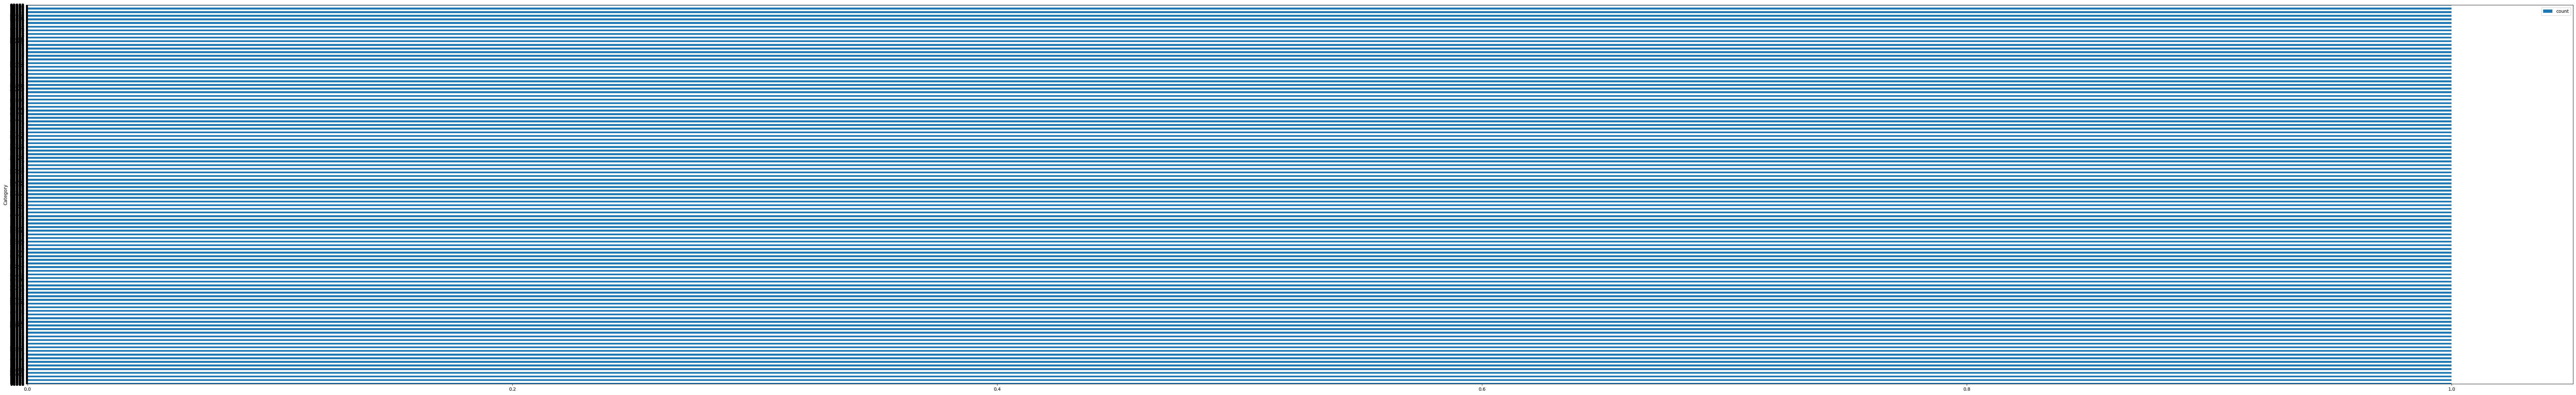

In [72]:
pd.DataFrame(df['Category'].value_counts(sort=False)).plot(kind='barh', figsize=(100, 15))

In [73]:
df['Category'].nunique()

8189

In [78]:
import os

# Папки с изображениями и метками
IMAGES_PATH = 'datasets/jpg/'
LABELS_PATH = 'datasets/segmim/'

# Получаем список изображений и меток
image_files = [f for f in os.listdir(IMAGES_PATH) if os.path.isfile(os.path.join(IMAGES_PATH, f))]
label_files = [f for f in os.listdir(LABELS_PATH) if os.path.isfile(os.path.join(LABELS_PATH, f))]

# Проверяем совпадение файлов (например, по именам)
common_files = set(image_files).intersection(set(label_files))

print(f"Общие файлы: {common_files}")


Общие файлы: set()


Пример картинок (random sample)


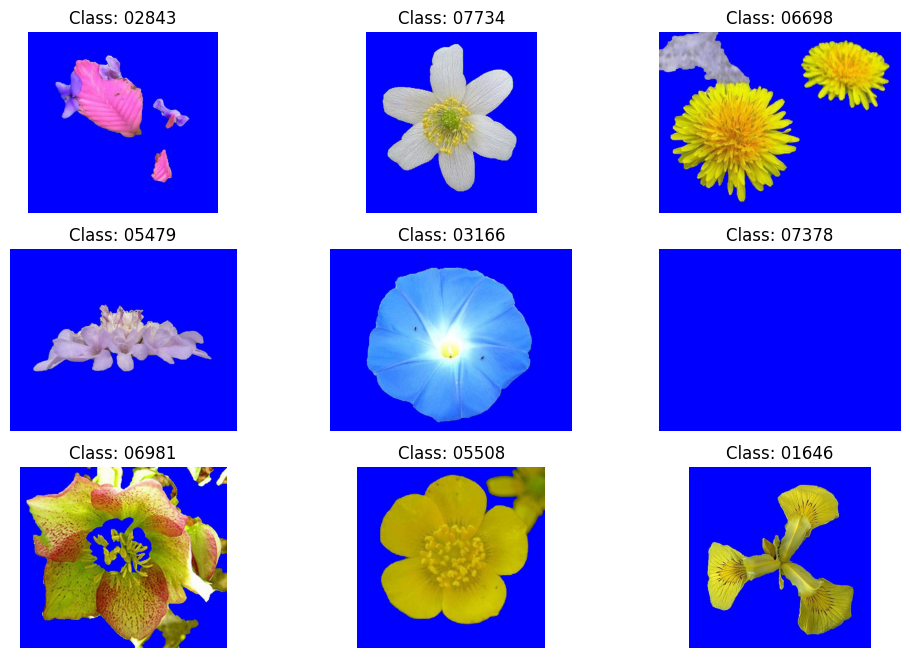

In [103]:
import PIL
import os
import matplotlib.pyplot as plt

# Путь к изображениям
PATH = '/Users/apple/python/SkillFactory/Ml_learning/НейронныеСети/5_module/datasets/segmim/'

print('Пример картинок (random sample)')
plt.figure(figsize=(12,8))

# Выбираем случайные 9 строк из DataFrame
random_image = df.sample(n=9)
random_image_paths = random_image['Id'].values
random_image_cat = random_image['Category'].values

for index, path in enumerate(random_image_paths):
    # Добавляем расширение, если его нет
    if not path.endswith('.jpg'):
        path = path + '.jpg'
    
    image_path = os.path.join(PATH, path)  # Полный путь к изображению
    
    # Проверяем, существует ли файл
    if os.path.exists(image_path):
        im = PIL.Image.open(image_path)
        plt.subplot(3, 3, index + 1)
        plt.imshow(im)
        plt.title('Class: ' + str(random_image_cat[index]))
        plt.axis('off')
    else:
        print(f"Файл не найден: {image_path}")

plt.show()


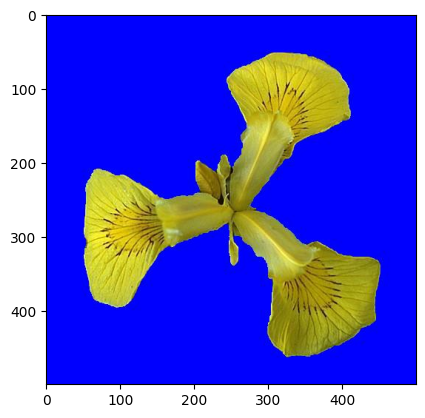

In [106]:
image = PIL.Image.open(PATH+path)
imgplot = plt.imshow(image)
plt.show()

In [108]:
from sklearn.model_selection import train_test_split

train_files, test_files, train_labels, test_labels = \
    train_test_split(df['Id'], df['Category'], test_size=0.2, random_state=42, stratify=df['Category'])

train_files = pd.DataFrame(train_files)
test_files = pd.DataFrame(test_files)
train_files['Category'] = train_labels
test_files['Category'] = test_labels

train_files.shape, test_files.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [109]:
print(df['Category'].value_counts())


Category
06915    1
02883    1
07737    1
07051    1
01420    1
        ..
07706    1
06418    1
01377    1
05111    1
03874    1
Name: count, Length: 8189, dtype: int64
